# Group 7 Tidal Project

### Setting up and loading in the data

In [1]:
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

# converted to days (float) from days hours:minutes
data1 = np.genfromtxt("ASTR19_S22_group_project_data.txt",dtype=str,delimiter=",")
days_list = []
height_list = []
for data in data1:
    day,time,height = data.split()
    hour,minute = time.split(":")
    days = float(day)-1 + (float(hour) + float(minute) / 60) / 24
    #hours = (float(day)-1)*24 + float(hour) + float(minute) / 60
    days_list.append(round(days,2))
    height_list.append(float(height))
days = np.array(days_list)
height = np.array(height_list)

### Function to model the data

In [2]:
# this is the function we're going to optimize
def function(x, a, b, c, d, f, g, h, i, j, k):
    #return 2*a * np.sin(b * x + c) + d * np.sin(f * x + g) + h
    return (a * np.sin(b * x + c) + d * np.sin(f * x + g)) * h * np.sin(i * x + j) + k
    

### Optimizing the function

In [3]:
# RMSE = 0.25
sig = 0.25
y_err = np.full(len(days),sig)

# works the best p0=[1.4, 1., -3.8, 1.6, -6.8, 3, 1.7, 1, 1]

# fitting the function and specifying starting guesses
p0=[2.4, 3., -3.8, 1.6, -6.8, 3, 1.7, 1, 1]
params, params_covariance = optimize.curve_fit(function, days, height,sigma=y_err, p0=[4.7, 2.1, 1.1, 1.3, 1.4, 1.6, 0.8, 1, 1, 2])

#params1, params_covariance2 = optimize.curve_fit(function2, days, height,sigma=y_err,p0=[0.5,2*np.pi,0.1,3])
#a, b, c, d = params1
#y_fit = function2(days, a, b, c, d)

# y_fit is the fitted function
a, b, c, d, f, g, h, i, j, k = params
y_fit = function(days, a, b, c, d, f, g, h, i, j, k)

### Plotting the results

Text(0, 0.5, 'Tide Height (ft)')

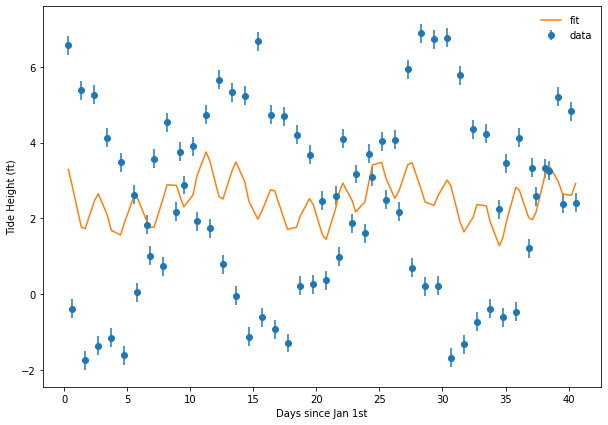

In [4]:
# Now let's plot the results
f = plt.figure(figsize=(10,7))

# plot the data points with error bars = RMSE (y_err)
plt.errorbar(days, height,yerr=y_err,fmt='o',label='data')

# plot the fitted function
plt.plot(days, y_fit, label='fit')

# add some detail to the plot
plt.legend(loc=0,frameon=False)
plt.xlabel("Days since Jan 1st")
plt.ylabel("Tide Height (ft)")

### Residual Plot

[3.2772619398043576, -3.248217114443882, 3.614018847540005, -3.4650666442956735, 2.796700368577548, -4.007221410511099, 2.051833645480193, -2.8316204242126504, 1.9178828718769738, -3.4842610083937244, 0.055755113687324, -2.495446400866984, -0.0959090292353948, -0.7487538022065303, 1.8011869026162843, -1.8238417560457019, 1.6521461983200316, -0.6979045084134081, 1.188384334233639, 0.5768012693846014, 1.2794239504701626, -1.2016517202833068, 0.9779209390877983, -1.7629170920811934, 3.0835931549904405, -1.7200255603194345, 2.0878324994408426, -3.528160853903245, 2.2663690542325896, -3.572318453271951, 4.691868850184648, -2.791632363884695, 1.9835121681721857, -3.654769143968376, 2.6803183765166043, -2.9987457988257753, 2.4329352330067753, -1.8518167429662957, 1.1617061497714505, -2.10041646139329, 0.9088745112391927, -1.0842127653938713, 0.34672392321742995, -1.6893995230046255, 1.1703472293118384, -0.6039924373287606, 0.9997437978313601, -0.8347432107290422, 0.7739538886808415, -0.308244

Text(0, 0.5, 'Residual')

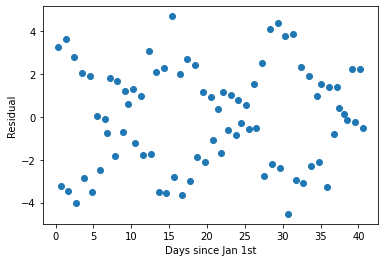

In [5]:
# calculate the residuals (observed - predicted)
residual_list = list(map(lambda real, pred: real - pred, height, y_fit))
print(residual_list)
plt.scatter(days,residual_list)
plt.xlabel("Days since Jan 1st")
plt.ylabel("Residual")

Residual Histogram

The standard deviation of the residuals is 2.311399957510787


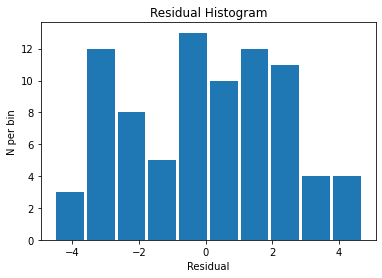

In [6]:
plt.hist(residual_list, rwidth=0.9)
plt.xlabel("Residual")
plt.ylabel("N per bin")
plt.title('Residual Histogram')

plt.savefig('histo.pdf', bbox_inches='tight', facecolor='white')

std = np.std(residual_list)
print(f"The standard deviation of the residuals is {std}")

Height Histogram With Outlier

The tsunami is 8.0 deviations, in terms of standard deviations of the distribution of normal tides, away from the model


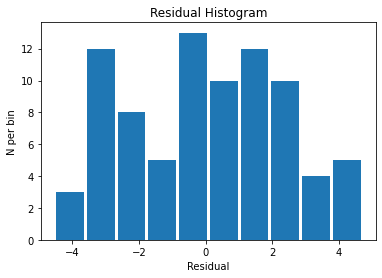

In [7]:
height[28] = height[28] + 2
#print(height_tsunami)
#print(height_normal)
#print(std_normal)
#print(std_outlier)
deviations = 2/sig
residual_list = list(map(lambda real, pred: real - pred, height, y_fit))
#print(residual_list)
plt.hist(residual_list, rwidth=0.9)
plt.xlabel("Residual")
plt.ylabel("N per bin")
plt.title('Residual Histogram')
print(f"The tsunami is {deviations} deviations, in terms of standard deviations of the distribution of normal tides, away from the model")